In [102]:

import os
os.chdir("/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU")
import pandas as pd # data processing
amazon=pd.read_csv('Input/AmazonShort.csv')

In [103]:
pwd

'/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU'

In [104]:
#!pip install vaderSentiment

In [105]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [106]:
review=amazon[['Reviews']]
review=review.dropna()

In [107]:
print(sentiment.polarity_scores("The phone is super cool."))

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [108]:
sentiment.polarity_scores("The phone is super cool.")['compound']

0.7351

In [109]:
print(sentiment.polarity_scores("The phone is super cool!"))
print(sentiment.polarity_scores("The phone is super cool!!"))
print(sentiment.polarity_scores("The phone is super cool!!!"))
print(sentiment.polarity_scores("The phone is super COOL!!!"))
print(sentiment.polarity_scores("The phone is super COOL!!! :-)"))

{'neg': 0.0, 'neu': 0.316, 'pos': 0.684, 'compound': 0.7574}
{'neg': 0.0, 'neu': 0.307, 'pos': 0.693, 'compound': 0.7772}
{'neg': 0.0, 'neu': 0.298, 'pos': 0.702, 'compound': 0.795}
{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.832}
{'neg': 0.0, 'neu': 0.229, 'pos': 0.771, 'compound': 0.8781}


In [110]:
#rev['polarity']=rev['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x)))

review['polarity_score']=review['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])
review['neutral'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
review['negative'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
review['positive'] = review['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])

In [ ]:
review.head(10)

In [112]:

review['sentiment']=''
review.loc[review.polarity_score>0.05,'sentiment']='Positive'
review.loc[(review.polarity_score>-0.05) & (review.polarity_score<0.05),'sentiment']='Neutral'
review.loc[review.polarity_score<-0.05,'sentiment']='Negative'


In [126]:
review.loc[6, 'Reviews']

'The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.'

In [113]:
import matplotlib.pyplot as plt
amazon[['polarity_score', 'sentiment']]=review[['polarity_score', 'sentiment']]

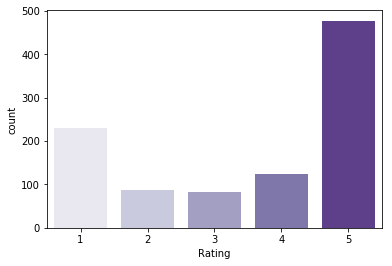

In [114]:
import seaborn as sns
sns.countplot(x='Rating', data=amazon, palette="Purples")

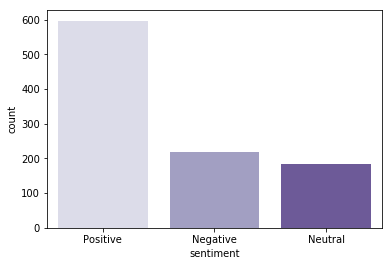

In [115]:
sns.countplot(x='sentiment', data=amazon, palette="Purples")

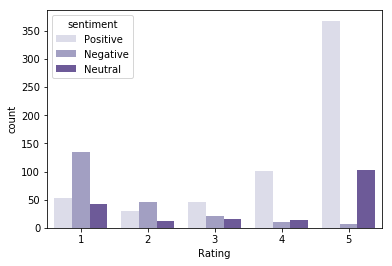

In [116]:
sns.countplot(x='Rating', hue="sentiment", data=amazon, palette="Purples")

### References
https://www.nltk.org/_modules/nltk/sentiment/vader.html

http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf

https://github.com/cjhutto/vaderSentiment

https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f